In [2]:
from keras.models import Sequential # allows to build neural network model in a sequential (layer-by-layer) manner
from keras.layers import Dense, Conv2D, Flatten, MaxPool2D #dense - each neuron connected to all neurons in previous layer, convo2D - extract spatial features from i/p images
# flatten-Converts multi-dimensional i/p to 1D vector before passing to dense layers, MaxPool2d-reduces spatial size of feature maps by selecting the max value in each region
from keras.datasets import mnist
from keras.utils import to_categorical #for one hot encoding
import matplotlib.pyplot as plt

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [5]:
# Reshaping the data to fit the model
X_train = X_train.reshape(60000, 28, 28, 1) #converts images from 2D (28×28) to 4D tensors with an additional channel dimension or depth
X_test = X_test.reshape(10000, 28, 28, 1)

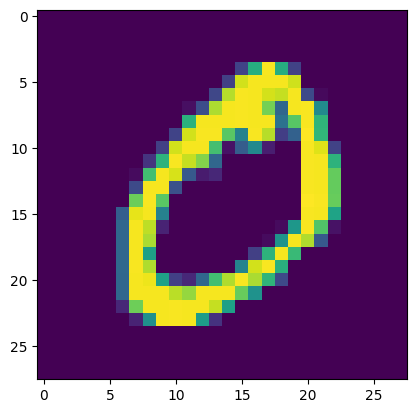

In [6]:
plt.imshow(X_train[1])

In [7]:
# One-Hot Encoding
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

In [8]:
# Printing new label
print(y_train_one_hot[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [9]:
# Build the CNN model
model = Sequential()

# Add model layers
model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(28, 28, 1)))
model.add(Conv2D(32, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=None, padding='valid', data_format=None))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy']) #compiling the model

In [11]:
hist = model.fit(X_train, y_train_one_hot, validation_data=(X_test, y_test_one_hot), epochs=12) #training the model

Epoch 1/12
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.8983 - loss: 0.8785 - val_accuracy: 0.9741 - val_loss: 0.0878
Epoch 2/12
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9772 - loss: 0.0751 - val_accuracy: 0.9778 - val_loss: 0.0721
Epoch 3/12
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9811 - loss: 0.0589 - val_accuracy: 0.9765 - val_loss: 0.0789
Epoch 4/12
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9854 - loss: 0.0459 - val_accuracy: 0.9793 - val_loss: 0.0686
Epoch 5/12
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9882 - loss: 0.0372 - val_accuracy: 0.9785 - val_loss: 0.0714
Epoch 6/12
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9916 - loss: 0.0262 - val_accuracy: 0.9781 - val_loss: 0.0712
Epoch 7/12
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9923 - loss: 0.0256 - val_accuracy: 0.9813 - val_loss: 0.0711
Epoch 8/12
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9933 - loss: 0.021